# Building a Process Behavior Control chart

_Based on the book [Measures of Success](https://leanpub.com/measuresofsuccess) by Mark Graban._

This is a learning experiment and a work in progress . I'd like to add automatic rules detection and shifting limit when process has changed.

## What is a PBC ?

A PBC is a control chart aiming to show if the behavior of a system has changed or not by separating useful signals from noise.

## Why would you use a PBC ?

* To stop over-reacting every time some measurement goes up or down. If nothing changed your probably just reacting to noise.
* To know when the changes you've introduced actually improved something.

## Building a PBC with Pandas

### Loading the (fake) data

In [356]:
import numpy as np
import pandas as pd

dates = pd.date_range('2022-04-10', periods=24, freq='D')

data = pd.DataFrame({'weight': [83,75,86,77,80,67,88,81,79,73,81,82,83,84,86,77,82,77,80,61,61,80,46,58]}, index=dates)

### Computing the average of all values

In [357]:
data['average'] = data['weight'].mean()

### Computing the Moving Range

$MR_n = abs(X_n - X_{n-1})$

In [358]:
data['MR'] = abs(data['weight'] - data['weight'].shift())

### Computing the Moving Range bar

The Moving Range bar is the average of the MR value for the N data points used to establish the baseline for the process.

Ideally, 20 historical data points are used to create the initial average and Natural Process Limits. Some references say to use 25 data points if you have them. It's just marginally better than having 20.

If you don't have enough historical data you can create a PBC with less data, starting from 6 to 8. The PBC will not be as statistically valid as one created using more data. Nevertheless, it can get you started, and you can recalculate average and limits as you're adding more points.

In [359]:
data['MR-bar'] = data['MR'][1:26].mean()

### Computing Natural Process Limits

Lower limit:

$LowerLimit = average - 3 \frac{MrBar}{1.128}$

Upper limit:
$UpperLimit = average + 3 \frac{MrBar}{1.128}$

In [360]:
data['LowerProcessLimit'] = data['average'] - 3 * data['MR-bar'] / 1.128
data['UpperProcessLimit'] = data['average'] + 3 * data['MR-bar'] / 1.128

### Reviewing the data

In [361]:
data

,weight,average,MR,MR-bar,LowerProcessLimit,UpperProcessLimit
2022-04-10,83,76.125,NaN,8.652174,53.113899,99.136101
2022-04-11,75,76.125,8.0,8.652174,53.113899,99.136101
2022-04-12,86,76.125,11.0,8.652174,53.113899,99.136101
2022-04-13,77,76.125,9.0,8.652174,53.113899,99.136101
2022-04-14,80,76.125,3.0,8.652174,53.113899,99.136101
2022-04-15,67,76.125,13.0,8.652174,53.113899,99.136101
2022-04-16,88,76.125,21.0,8.652174,53.113899,99.136101
2022-04-17,81,76.125,7.0,8.652174,53.113899,99.136101
2022-04-18,79,76.125,2.0,8.652174,53.113899,99.136101
2022-04-19,73,76.125,6.0,8.652174,53.113899,99.136101


### Graph the X Chart

Graph an X Chart with the values, the average, the Upper and Lower Natural Process Limits.

We can use the 3 rules to detect signals

* **Rule 1:** Any data point outside of the limits.
* **Rule 2:** Eight consecutive points on the same side of the central line.
* **Rule 3:** Three out of four consecutive data points that are closer to the same limit than they are to the central line.

<AxesSubplot: >

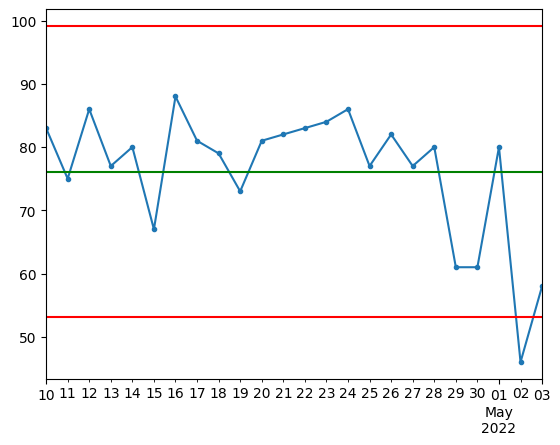

In [362]:
data[['weight', 'average', 'LowerProcessLimit', 'UpperProcessLimit']].plot(legend=False, style={'weight': ".-", 'average': 'green', 'UpperProcessLimit': 'red','LowerProcessLimit': 'red'})

## Computing the MR upper range limit

In [363]:
data['MR-upperRangeLimit'] = data['MR-bar'] * 3.268

### Graph the MR Chart

The MR chart shows of the variation period-to-period is consistent over time. Sometimes the X Chart shows all data points as being noise but the variation can be signal we want to investigate as the cause of the variation might indicate a future change in the process.

The MR chart only has one rule to look for signals:

* **Rule 1:** Are there any points above the Upper Range Limit?

<AxesSubplot: >

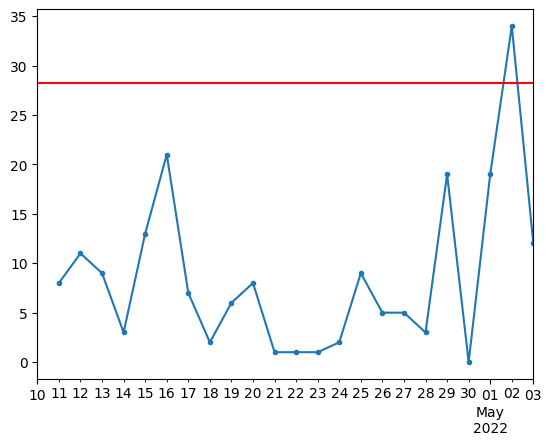

In [364]:
data[['MR', 'MR-upperRangeLimit']].plot(style={'MR': '.-', 'MR-upperRangeLimit': 'red'}, legend=False)

## Detecting signals

## Signal 1

Signal 1 occurs when data point is outside the Natural Process Limits.

In [365]:
data['Signal1'] = np.where((data['weight'] < data['LowerProcessLimit']) | (data['weight'] > data['UpperProcessLimit']), True, False)

data

,weight,average,MR,MR-bar,LowerProcessLimit,UpperProcessLimit,MR-upperRangeLimit,Signal1
2022-04-10,83,76.125,NaN,8.652174,53.113899,99.136101,28.275304,False
2022-04-11,75,76.125,8.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-12,86,76.125,11.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-13,77,76.125,9.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-14,80,76.125,3.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-15,67,76.125,13.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-16,88,76.125,21.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-17,81,76.125,7.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-18,79,76.125,2.0,8.652174,53.113899,99.136101,28.275304,False
2022-04-19,73,76.125,6.0,8.652174,53.113899,99.136101,28.275304,False


## Signal 2

Signal 2 occurs with 8 consecutive points on the same side of the central line.

In [371]:
data['Signal2'] = False

average = data['weight'].mean()
eightPointAboveAverage = data[data['weight'].rolling(8).apply(lambda x: np.all(x > average)) == 1.0]
eightPointBelowAverage = data[data['weight'].rolling(8).apply(lambda x: np.all(x < average)) == 1.0]

for i in pd.concat([eightPointAboveAverage, eightPointBelowAverage]).index:
    indexLess8 = data.index[data.index.get_loc(i) - 8]
    data.loc[indexLess8 : i, 'Signal2'] = True

data

,weight,average,MR,MR-bar,LowerProcessLimit,UpperProcessLimit,MR-upperRangeLimit,Signal1,Signal2
2022-04-10,83,76.125,NaN,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-11,75,76.125,8.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-12,86,76.125,11.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-13,77,76.125,9.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-14,80,76.125,3.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-15,67,76.125,13.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-16,88,76.125,21.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-17,81,76.125,7.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-18,79,76.125,2.0,8.652174,53.113899,99.136101,28.275304,False,False
2022-04-19,73,76.125,6.0,8.652174,53.113899,99.136101,28.275304,False,True
